# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [52]:
# Install Dependencies
!pip install pandas
!pip install seaborn
!pip install plotly
!pip install folium


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import seaborn as sb
import plotly.graph_objects as go
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

In [54]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df = pd.read_csv(url)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [56]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [57]:
df.head(10)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
6  5121                                   BlissArtsSpace!     7356   
7  5178                  Large Furnished Room Near B'way      8967   
8  5203                Cozy Clean Guest Room - Family Apt     7490   
9  5238                Cute & Cozy Lower East Side 1 bdrm     7549   

     host_name neighbourhood_group       neighbourhood  latitude  longitude  \
0         John            Brooklyn          Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan             Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan              Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn        Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan         East Harlem  40.79851  -73.94399   
5        Chris           Manhattan         Murray Hill  40.74767  -73.97500   
6        Garon            Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7     Shunichi           Manhattan      Hell's Kitchen  40.76489  -73.98493   
8    MaryEllen           Manhattan     Upper West Side  40.80178  -73.96723   
9          Ben           Manhattan           Chinatown  40.71344  -73.99037   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   
5  Entire home/apt    200               3                 74  2019-06-22   
6     Private room     60              45                 49  2017-10-05   
7     Private room     79               2                430  2019-06-24   
8     Private room     79               2                118  2017-07-21   
9  Entire home/apt    150               1                160  2019-06-09   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0  
5               0.59                               1               129  
6               0.40                               1                 0  
7               3.47                               1               220  
8               0.99                               1                 0  
9               1.33                               4               188

In [58]:
df.shape

(48895, 16)

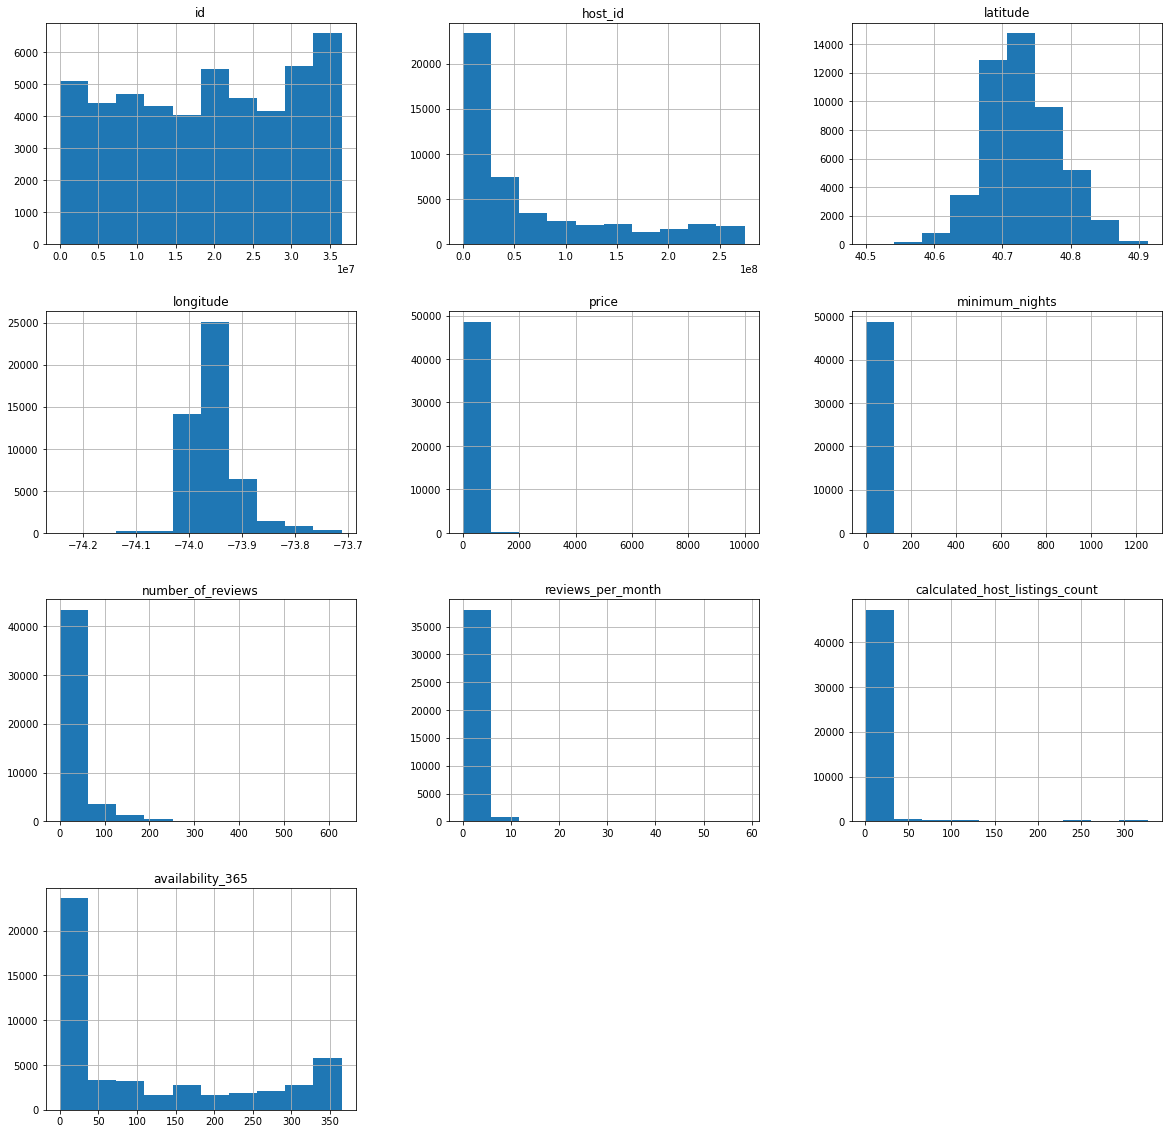

In [59]:
df.hist(figsize=(20, 20))
plt.show()

In [60]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [61]:
Long=-73.80
Lat=40.80
locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [62]:
df.neighbourhood_group.nunique()

5

In [63]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

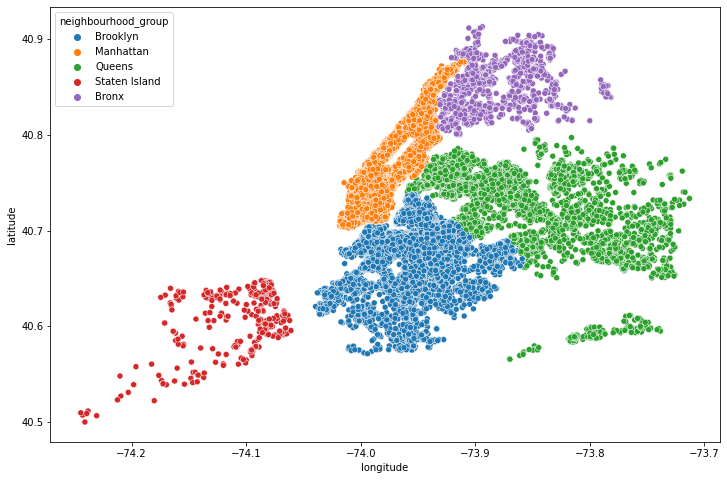

In [64]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.show()

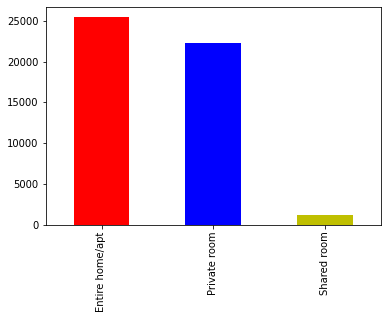

In [65]:
df['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])
plt.show()

In [66]:
apartment = df[df['room_type']=='Entire home/apt']
df_apt_group = apartment.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
df_apt_group.head(10)

host_id     host_name       neighbourhood neighbourhood_group  \
20211  219517861  Sonder (NYC)  Financial District           Manhattan   
6449     7503643          Vida          Greenpoint            Brooklyn   
8430    12243051        Sonder  Financial District           Manhattan   
20214  219517861  Sonder (NYC)         Murray Hill           Manhattan   
19900  205031545    Red Awning             Midtown           Manhattan   
17832  120762452       Stanley         Murray Hill           Manhattan   
12273   30283594          Kara      Hell's Kitchen           Manhattan   
17451  107434423    Blueground             Chelsea           Manhattan   
12275   30283594          Kara             Midtown           Manhattan   
17628  113805886        Yaacov     Upper East Side           Manhattan   

       apartment  
20211        210  
6449          52  
8430          51  
20214         50  
19900         49  
17832         49  
12273         41  
17451         37  
12275         33  
17628         33

In [67]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

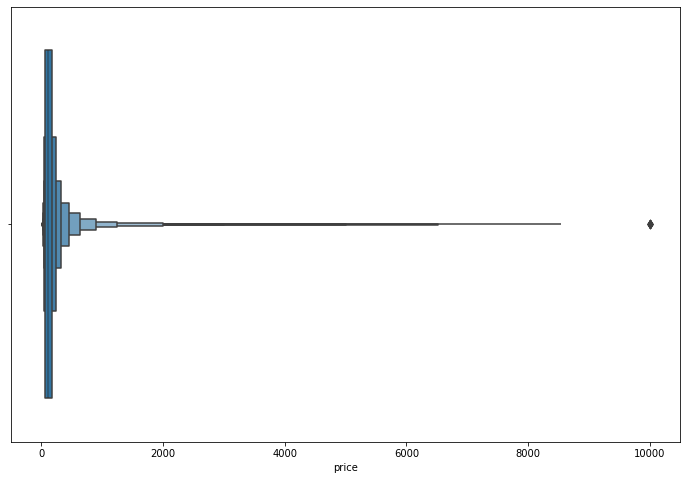

In [68]:
plt.figure(figsize=(12,8))
sns.boxenplot(x='price',data=df)

In [69]:
df_price = df[df['price'] > 0]
df_price

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48884 rows x 16 columns]

In [70]:
df_price.reset_index(inplace=True)

In [71]:
df_price.head(5)

index    id                                              name  host_id  \
0      0  2539                Clean & quiet apt home by the park     2787   
1      1  2595                             Skylit Midtown Castle     2845   
2      2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3      3  3831                   Cozy Entire Floor of Brownstone     4869   
4      4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

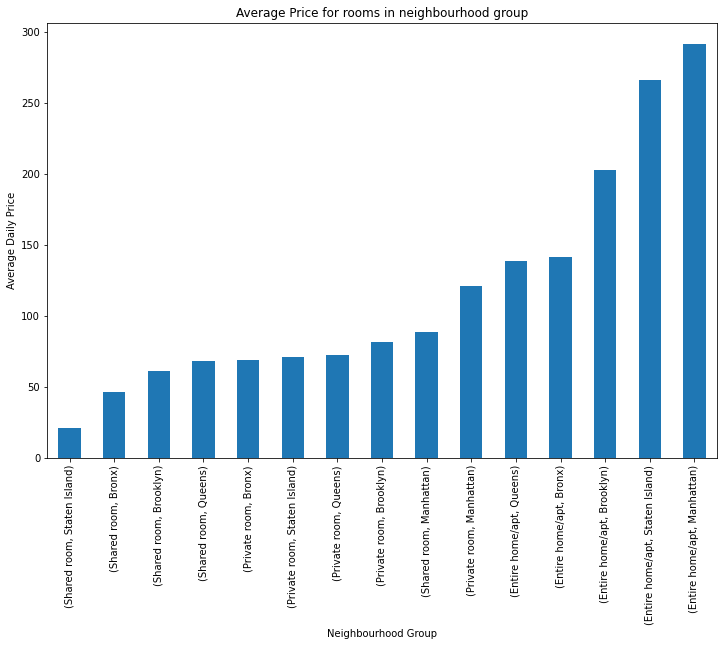

In [72]:
plt.figure(figsize=(12,8))
df1 = df[df['minimum_nights']==1]
df2 = df1.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df2.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()


In [73]:
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df2).sort_values(by='room_type')

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [74]:
df1.reset_index(inplace=True)

In [75]:
DIC = df1.to_dict('records')
DIC

[{'index': 0,
  'id': 2539,
  'name': 'Clean & quiet apt home by the park',
  'host_id': 2787,
  'host_name': 'John',
  'neighbourhood_group': 'Brooklyn',
  'neighbourhood': 'Kensington',
  'latitude': 40.64749,
  'longitude': -73.97237,
  'room_type': 'Private room',
  'price': 149,
  'minimum_nights': 1,
  'number_of_reviews': 9,
  'last_review': '2018-10-19',
  'reviews_per_month': 0.21,
  'calculated_host_listings_count': 6,
  'availability_365': 365},
 {'index': 1,
  'id': 2595,
  'name': 'Skylit Midtown Castle',
  'host_id': 2845,
  'host_name': 'Jennifer',
  'neighbourhood_group': 'Manhattan',
  'neighbourhood': 'Midtown',
  'latitude': 40.75362,
  'longitude': -73.98377,
  'room_type': 'Entire home/apt',
  'price': 225,
  'minimum_nights': 1,
  'number_of_reviews': 45,
  'last_review': '2019-05-21',
  'reviews_per_month': 0.38,
  'calculated_host_listings_count': 2,
  'availability_365': 355},
 {'index': 3,
  'id': 3831,
  'name': 'Cozy Entire Floor of Brownstone',
  'host_id':

In [76]:
#df1['price'] =  df1.apply(lambda x: get_price_zeros(x['price'],x['neithbou'],x['room_type'], 0), axis=1)

In [77]:
df1

index        id                                               name  \
0          0      2539                 Clean & quiet apt home by the park   
1          1      2595                              Skylit Midtown Castle   
2          3      3831                    Cozy Entire Floor of Brownstone   
3          9      5238                 Cute & Cozy Lower East Side 1 bdrm   
4         17      7322                                    Chelsea Perfect   
...      ...       ...                                                ...   
12715  48878  36479723                                      Room for rest   
12716  48880  36481315  The Raccoon Artist Studio in Williamsburg New ...   
12717  48887  36483152    Garden Jewel Apartment in Williamsburg New York   
12718  48889  36484363                                 QUIT PRIVATE HOUSE   
12719  48893  36485609               43rd St. Time Square-cozy single bed   

         host_id    host_name neighbourhood_group   neighbourhood  latitude  \
0           2787         John            Brooklyn      Kensington  40.64749   
1           2845     Jennifer           Manhattan         Midtown  40.75362   
2           4869  LisaRoxanne            Brooklyn    Clinton Hill  40.68514   
3           7549          Ben           Manhattan       Chinatown  40.71344   
4          18946         Doti           Manhattan         Chelsea  40.74192   
...          ...          ...                 ...             ...       ...   
12715   41326856  Jeerathinan              Queens        Elmhurst  40.74477   
12716  208514239        Melki            Brooklyn    Williamsburg  40.71232   
12717  208514239        Melki            Brooklyn    Williamsburg  40.71232   
12718  107716952      Michael              Queens         Jamaica  40.69137   
12719   30985759          Taz           Manhattan  Hell's Kitchen  40.75751   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.95976  Entire home/apt     89               1                270   
3      -73.99037  Entire home/apt    150               1                160   
4      -73.99501     Private room    140               1                260   
...          ...              ...    ...             ...                ...   
12715  -73.87727     Private room     45               1                  0   
12716  -73.94220  Entire home/apt    120               1                  0   
12717  -73.94220  Entire home/apt    170               1                  0   
12718  -73.80844     Private room     65               1                  0   
12719  -73.99112      Shared room     55               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2      2019-07-05               4.64                               1   
3      2019-06-09               1.33                               4   
4      2019-07-01               2.12                               1   
...           ...                ...                             ...   
12715         NaN                NaN                               5   
12716         NaN                NaN                               3   
12717         NaN                NaN                               3   
12718         NaN                NaN                               2   
12719         NaN                NaN                               6   

       availability_365  
0                   365  
1                   355  
2                   194  
3                   188  
4                    12  
...                 ...  
12715               172  
12716               365  
12717               365  
12718               163  
12719                 2  

[12720

In [78]:
def categoria_precio(precio):
  if precio <= 69:
    return '25%'
  elif precio <= 106:
    return '50%'
  elif precio <= 175:
    return '70%'
  else:
    return '100%'

In [79]:
df['Price_category'] = df['price'].apply(categoria_precio)

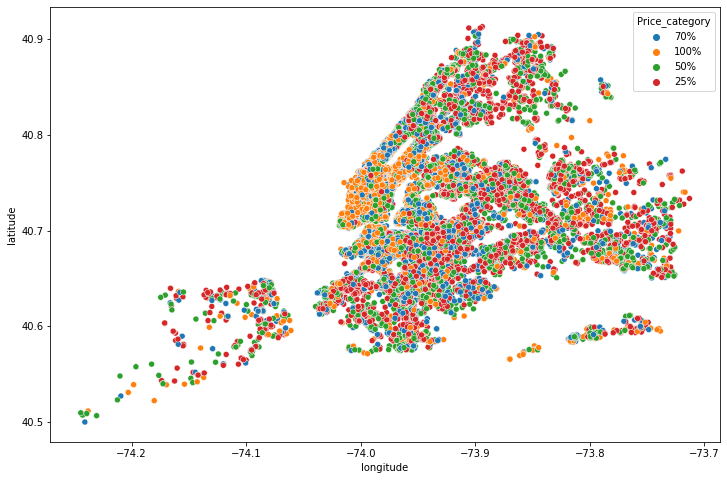

In [80]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.Price_category)
plt.show()

In [81]:
fig = go.Figure()
fig.add_trace(go.Box(y=df["price"], name="All"))
fig.update_layout({
    'xaxis': {
        'title_text': "All_df",
    },
    'yaxis': {
        'title_text': "Price",
    },
    })    
fig.show()

In [82]:
price_out = df['price'].describe()
price_out

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [83]:
IQR = price_out['75%'] - price_out['25%']
upper = price_out['75%'] + 1.5*IQR
lower = price_out['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper,lower))

The upper & lower bounds for suspected outliers are 334.0 and -90.0.


In [84]:
df[df['price'] > 9000]

id                                               name   host_id  \
6530    4737930                                 Spanish Harlem Apt   1235070   
9151    7003697                Furnished room in Astoria apartment  20582832   
12342   9528920                Quiet, Clean, Lit @ LES & Chinatown   3906464   
17692  13894339    Luxury 1 bedroom apt. -stunning Manhattan views   5143901   
29238  22436899                                1-BR Lincoln Center  72390391   
40433  31340283  2br - The Heart of NYC: Manhattans Lower East ...   4382127   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
6530      Olson           Manhattan      East Harlem  40.79264  -73.93898   
9151   Kathrine              Queens          Astoria  40.76810  -73.91651   
12342       Amy           Manhattan  Lower East Side  40.71355  -73.98507   
17692      Erin            Brooklyn       Greenpoint  40.73260  -73.95739   
29238    Jelena           Manhattan  Upper West Side  40.77213  -73.98665   
40433      Matt           Manhattan  Lower East Side  40.71980  -73.98566   

             room_type  price  minimum_nights  number_of_reviews last_review  \
6530   Entire home/apt   9999               5                  1  2015-01-02   
9151      Private room  10000             100                  2  2016-02-13   
12342     Private room   9999              99                  6  2016-01-01   
17692  Entire home/apt  10000               5                  5  2017-07-27   
29238  Entire home/apt  10000              30                  0         NaN   
40433  Entire home/apt   9999              30                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  \
6530                0.02                               1                 0   
9151                0.04                               1                 0   
12342               0.14                               1                83   
17692               0.16                               1                 0   
29238                NaN                               1                83   
40433                NaN                               1               365   

      Price_category  
6530            100%  
9151            100%  
12342           100%  
17692           100%  
29238           100%  
40433           100%

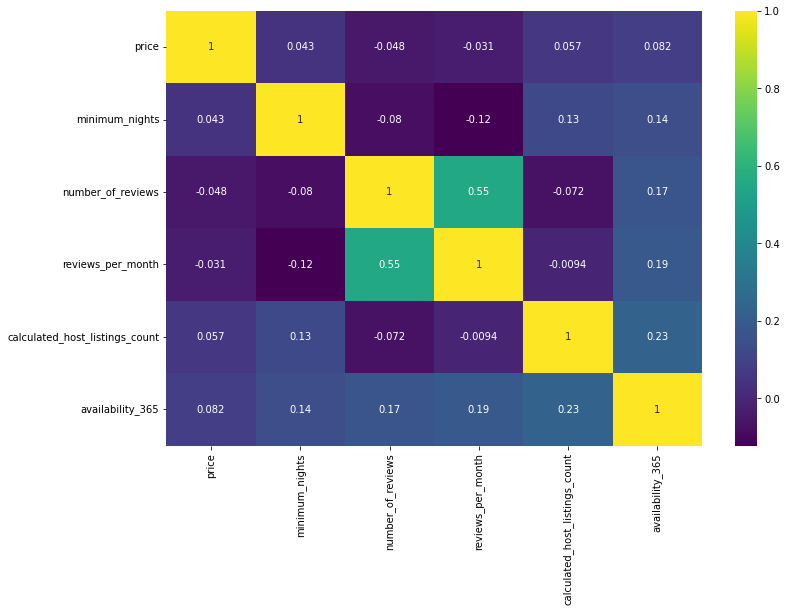

In [85]:
df_corr=df[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',  'availability_365']]
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='viridis')
plt.show()

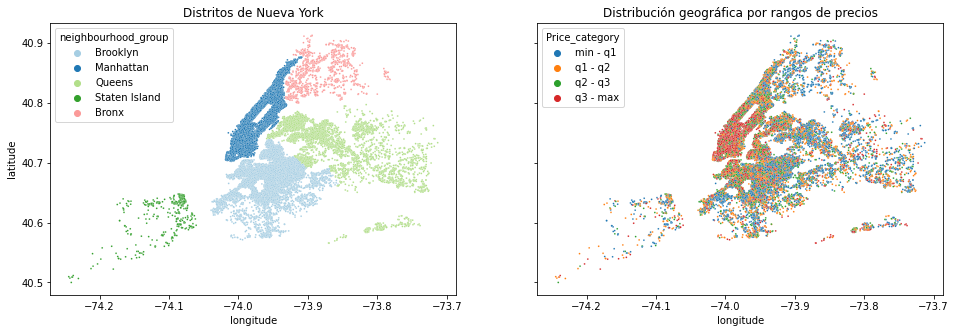

In [86]:
q1_pr = df['price'].quantile(q=0.25)
q2_pr = df['price'].quantile(q=0.5)
q3_pr = df['price'].quantile(q=0.75)

def categoria_precio(precio):
  if precio <= q1_pr:
    return 'min - q1'
  elif precio <= q2_pr:
    return 'q1 - q2'
  elif precio <= q3_pr:
    return 'q2 - q3'
  else:
    return 'q3 - max'

df['Price_category'] = df['price'].apply(categoria_precio).astype('category')
plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighbourhood_group, s=3, palette='Paired')
plt.title('Distritos de Nueva York')
plt.subplot(1, 2, 2)
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.Price_category, hue_order=['min - q1', 'q1 - q2', 'q2 - q3', 'q3 - max'], s=3)
plt.title('Distribución geográfica por rangos de precios')
plt.show()

/tmp/ipykernel_1112/2521861589.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



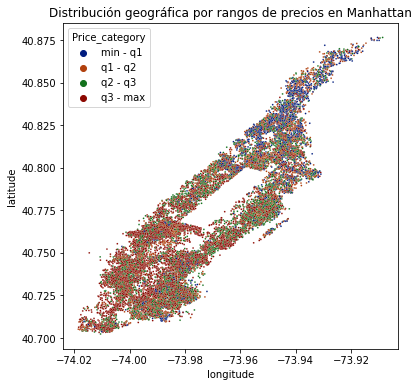

In [87]:
df_manhattan = df[df['neighbourhood_group']=='Manhattan']
df_manhattan['Price_category'] = df_manhattan['price'].apply(categoria_precio).astype('category')

plt.figure(figsize=(6, 6))
sns.scatterplot(x=df_manhattan.longitude, y=df_manhattan.latitude, hue=df_manhattan.Price_category, hue_order=['min - q1', 'q1 - q2', 'q2 - q3', 'q3 - max'], s=3, palette='dark')
plt.title('Distribución geográfica por rangos de precios en Manhattan')
plt.show()

/tmp/ipykernel_1112/2343376060.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1112/2343376060.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



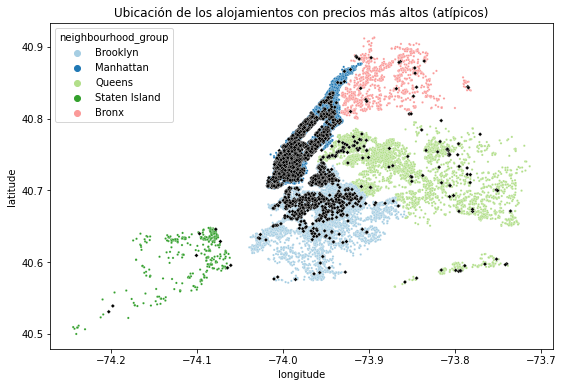

In [88]:
max_pr = 334
min_pr = -90
df_outliers = df[(df['price']>=max_pr) | (df['price']<=min_pr)]

df_outliers['Categoria_outliers_precio'] = 'Precios más altos (outliers)'
df_outliers['Categoria_outliers_precio'] = df_outliers['Categoria_outliers_precio'].astype('category')
color = ['k']

plt.figure(figsize=(9,6))
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.neighbourhood_group, s=5, palette='Paired')
sns.scatterplot(x=df_outliers.longitude, y=df_outliers.latitude, hue=df_outliers.Categoria_outliers_precio, palette=color, s=8, marker='D', legend=False)
plt.title('Ubicación de los alojamientos con precios más altos (atípicos)')
plt.show()

In [89]:
max_pr = 334
min_pr = -90
df_sin_outliers = df[(df['price']>=max_pr) | (df['price']<=min_pr)]
df_sin_outliers

id                                               name    host_id  \
61        15396                 Sunny & Spacious Chelsea Apartment      60278   
85        19601                perfect for a family or small group      74303   
103       23686  2000 SF 3br 2bath West Village private  townhouse      93790   
114       26933  2 BR / 2 Bath Duplex Apt with patio! East Village      72062   
121       27659                   3 Story Town House in Park Slope     119588   
...         ...                                                ...        ...   
48758  36420289    Rustic Garden House Apt, 2 stops from Manhattan   73211393   
48833  36450896   Brand New 3-Bed Apt in the Best Location of FiDi   29741813   
48839  36452721  Massage Spa. Stay overnight. Authors Artist dr...  274079964   
48842  36453160  LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...  224171371   
48856  36457700  Large 3 bed, 2 bath , garden , bbq , all you need   66993395   

                     host_name neighbourhood_group       neighbourhood  \
61                       Petra           Manhattan             Chelsea   
85                      Maggie            Brooklyn    Brooklyn Heights   
103                        Ann           Manhattan        West Village   
114                      Bruce           Manhattan        East Village   
121                       Vero            Brooklyn         South Slope   
...                        ...                 ...                 ...   
48758                LaGabrell              Queens    Long Island City   
48833                      Yue           Manhattan  Financial District   
48839                  Richard            Brooklyn      Sheepshead Bay   
48842  LuxuryApartmentsByAmber           Manhattan             Chelsea   
48856                   Thomas            Brooklyn  Bedford-Stuyvesant   

       latitude  longitude        room_type  price  minimum_nights  \
61     40.74623  -73.99530  Entire home/apt    375             180   
85     40.69723  -73.99268  Entire home/apt    800               1   
103    40.73096  -74.00319  Entire home/apt    500               4   
114    40.72540  -73.98157  Entire home/apt    350               2   
121    40.66499  -73.97925  Entire home/apt    400               2   
...         ...        ...              ...    ...             ...   
48758  40.75508  -73.93258  Entire home/apt    350               2   
48833  40.70605  -74.01042  Entire home/apt    475               2   
48839  40.59866  -73.95661     Private room    800               1   
48842  40.75204  -74.00292  Entire home/apt    350               1   
48856  40.68886  -73.92879  Entire home/apt    345               4   

       number_of_reviews last_review  reviews_per_month  \
61                     5  2018-11-03               0.12   
85                    25  2016-08-04               0.24   
103                   46  2019-05-18               0.55   
114                    7  2017-08-09               0.06   
121                   16  2018-12-30               0.24   
...                  ...         ...                ...   
48758                  0         NaN                NaN   
48833                  0         NaN                NaN   
48839                  0         NaN                NaN   
48842                  0         NaN                NaN   
48856                  0         NaN                NaN   

       calculated_host_listings_count  availability_365 Price_category  
61                                  1               180       q3 - max  
85                                  1                 7       q3 - max  
103                                 2               243       q3 - max  
114                                 4               298       q3 - max  
121                                 2               216       q3 - max  
...                               ...               ...            ...  
48758                               1               364       q3 - max  
48833            

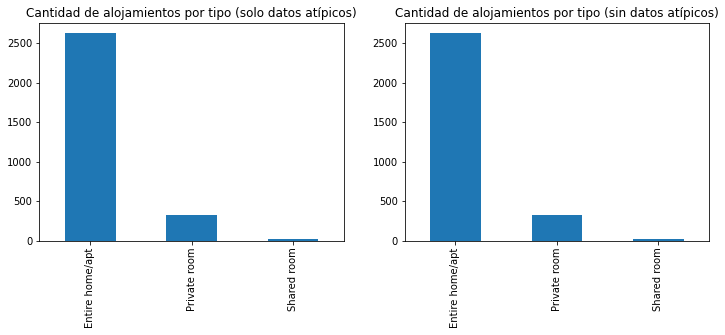

In [90]:
plt.subplots(1, 2, figsize=(12,4))
plt.subplot(1, 2, 1)
df_outliers['room_type'].value_counts().plot(kind='bar')
plt.title('Cantidad de alojamientos por tipo (solo datos atípicos)')
plt.subplot(1, 2, 2)
df_sin_outliers['room_type'].value_counts().plot(kind='bar')
plt.title('Cantidad de alojamientos por tipo (sin datos atípicos)')
plt.show()

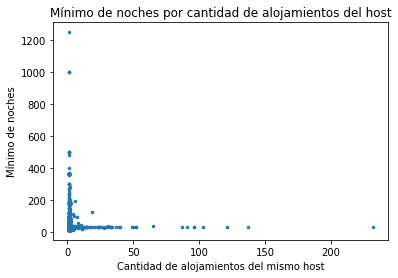

In [91]:
fig = px.box(df, x='minimum_nights')
fig.show()
q1_mn = df['minimum_nights'].quantile(0.25)
q3_mn = df['minimum_nights'].quantile(0.75)
IQR_mn = q3_mn - q1_mn
max_o_mn = q3_mn + 1.5*IQR_mn
df_outliers_min_nights = df[df['minimum_nights']>max_o_mn]
df_min_nights = df_outliers_min_nights.groupby('host_id').agg({'minimum_nights': np.mean, 'id': pd.Series.nunique})
pd.DataFrame(df_min_nights)

plt.scatter(df_min_nights['id'], df_min_nights['minimum_nights'], s=6)
plt.xlabel('Cantidad de alojamientos del mismo host')
plt.ylabel('Mínimo de noches')
plt.title('Mínimo de noches por cantidad de alojamientos del host')
plt.show()